<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2021/blob/main/NLP/The_Transformer_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O'Reilly: Transformer Building Blocks with Python in Pytorch



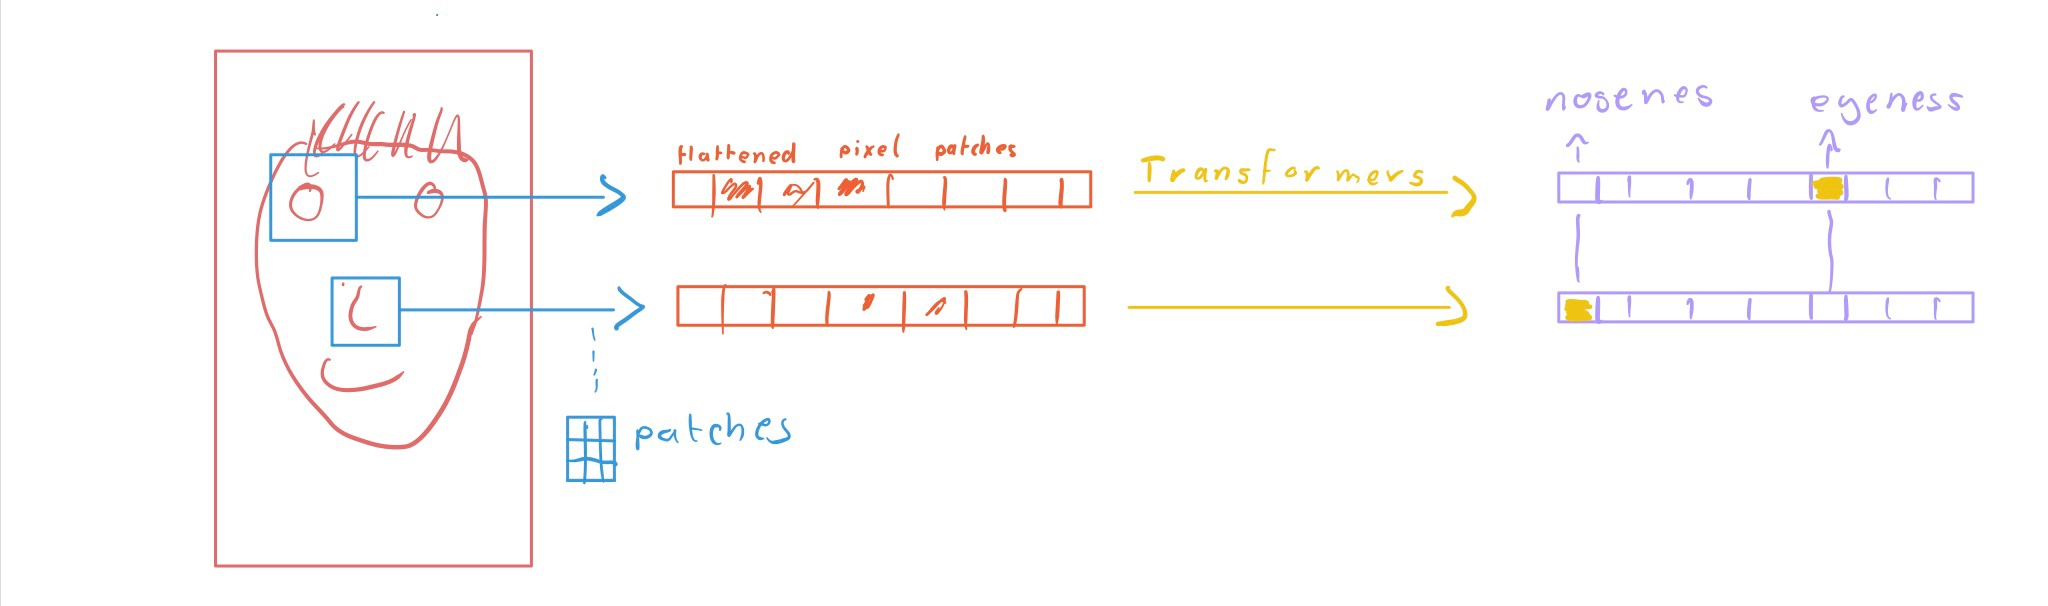

> **You shall know a word by the company it keeps.**

Firth, 1957



## Intro To Transformers



1.   History Recap - where do Transformers come from, where does Attention come from?
    
    [Attention Is All You Need (2017)](https://arxiv.org/pdf/1706.03762.pdf)

2.   Transferability for Tranformer Technology


## Intro To Google Colab and Computer Vision

In [ ]:
print("Hello Google Colab")

z = 5

Hello Google Colab


In [ ]:
z

5

### Get The Data


[The German Traffic Sign Recognition Benchmark](https://benchmark.ini.rub.de/gtsrb_news.html)


In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!unzip -n GTSRB_Final_Training_Images.zip > /dev/null
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
!unzip -n GTSRB_Final_Test_Images.zip > /dev/null

--2021-09-20 14:07:45--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip.1’

GTSRB_Final_Trainin 100%[===================>] 263.50M  24.9MB/s    in 12s     

2021-09-20 14:07:57 (22.6 MB/s) - ‘GTSRB_Final_Training_Images.zip.1’ saved [276294756/276294756]

--2021-09-20 14:07:58--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip.1’

GTSRB_Final_Test_Im 100%[===================>]


What does this code do?

In [ ]:
# Train

import matplotlib.pyplot as plt
import csv
from PIL import Image
import numpy as np 
#         if int(row[7]) in [14, 17, 32, 8]: 
rootpath = 'GTSRB/Final_Training/Images'
images = [] # images
labels = [] # corresponding labels

image_height, image_width = 24, 24 
# loop over all 42 classes
for c in range(0,43):
    prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
    gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
          img = Image.open(prefix + row[0])
          img = np.array(img.resize((image_width,image_height)))
          images.append(img) # the 1th column is the filename
          labels.append(int(row[7])) # the 8th column is the label
    gtFile.close()



In [ ]:
# Test

import matplotlib.pyplot as plt
import csv
from PIL import Image
import numpy as np 
#         if int(row[7]) in [14, 17, 32, 8]: 
rootpath = 'GTSRB/Final_Test/Images/'
images_test = [] # images
labels_test = [] # corresponding labels

image_height, image_width = 24, 24 
# loop over all 42 classes

gtFile = open(rootpath + 'GT-final_test.test.csv') # annotations file
gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
next(gtReader) # skip header
# loop over all images in current annotations file
for row in gtReader:
      img = Image.open(rootpath + row[0])
      img = np.array(img.resize((image_width,image_height)))
      images_test.append(img) # the 1th column is the filename
      labels_test.append(int(row[6])) # the 8th column is the label
gtFile.close()



In [ ]:
n = 100
images_full, labels_full = images, labels
images, labels = images[:n], labels[:n]

### Inspect the Data: Show Images

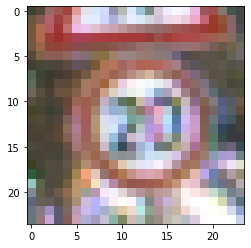

In [ ]:
plt.imshow(images[34])

In [ ]:
images[0].shape, images[1].shape, images[2].shape

((24, 24, 3), (24, 24, 3), (24, 24, 3))

In [ ]:
labels[34]

0

### Persistent Your Results: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Building Block: Image Patches

### Patches

In [ ]:
dim = 64

In [ ]:
!pip install einops

In [ ]:
import torch
from torch import nn

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

torch.manual_seed(42)

In [ ]:
channels = 3
patch_width, patch_height = 12, 12 
num_patches = (image_height // patch_height) * (image_width // patch_width)
num_patches


4

In [ ]:
patch_dim = channels * patch_height * patch_width
patch_dim

432

In [ ]:
23, 24, 24, 3 

(23, 24, 24, 3)

In [ ]:
to_patch = nn.Sequential(
            Rearrange('b  (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width),
          
        )

In [ ]:
patches = to_patch(torch.Tensor(images))

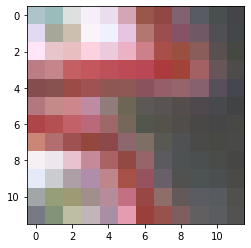

In [ ]:
plt.imshow(patches[1, 1, :].reshape(12, 12, 3) / 255)

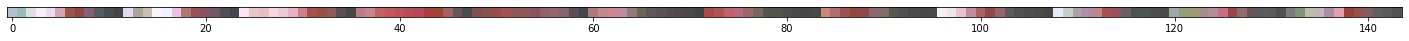

In [ ]:
plt.figure(figsize=(25, 5))
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = True, bottom = True)
plt.imshow(patches[1, 1, :].reshape(1, 12 * 12, 3) / 255)

In [ ]:
to_patch_embedding = nn.Sequential(
            Rearrange('b  (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width),
            nn.Linear(patch_dim, dim),
    )

In [ ]:
patch_embeddings = to_patch_embedding(torch.Tensor(images))

In [ ]:
patch_embeddings.shape

torch.Size([100, 4, 64])

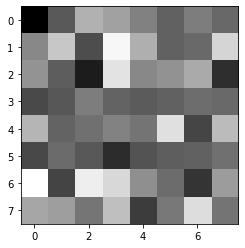

In [ ]:
plt.imshow(patch_embeddings[1, 1, :].detach().numpy().reshape(8, 8) / 255, cmap='gray')

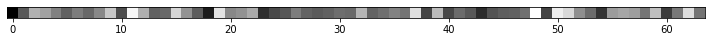

In [ ]:
plt.figure(figsize=(12.5, 5))
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = True, bottom = True)
plt.imshow(patch_embeddings[1, 1, :].detach().numpy().reshape(1, 8*8) / 255, cmap='gray')

### Positional Encoding 

In [ ]:
cls_token =  nn.Parameter(torch.randn(1, 1, dim))
pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))

x = to_patch_embedding(torch.Tensor(images))
x.shape, cls_token.shape

(torch.Size([100, 4, 64]), torch.Size([1, 1, 64]))

In [ ]:
b, n, _ = x.shape
b, n

(100, 4)

In [ ]:
cls_tokens = repeat(cls_token, '() n d -> b n d', b = b)
cls_tokens.shape

torch.Size([100, 1, 64])

In [ ]:
x = torch.cat((cls_tokens, x), dim=1)
x += pos_embedding[:, :(n + 1)]
x.shape

torch.Size([100, 5, 64])

### Data Loader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

dataset = TensorDataset(Tensor(images_full), torch.tensor(labels_full, dtype=torch.long))

loader = DataLoader(dataset, batch_size=64, shuffle=True)

for batch_ndx, sample in enumerate(loader):
    #print(sample)
    break

In [ ]:
dataset_test = TensorDataset(Tensor(images_test), torch.tensor(labels_test, dtype=torch.long))

loader_test = DataLoader(dataset, batch_size=8, shuffle=True)

## Foundational Concept: Self-Attention

[An Image Is Worth 16x16 Words: Transformers For Image Recognition At Scale (2021)](https://arxiv.org/pdf/2010.11929.pdf)


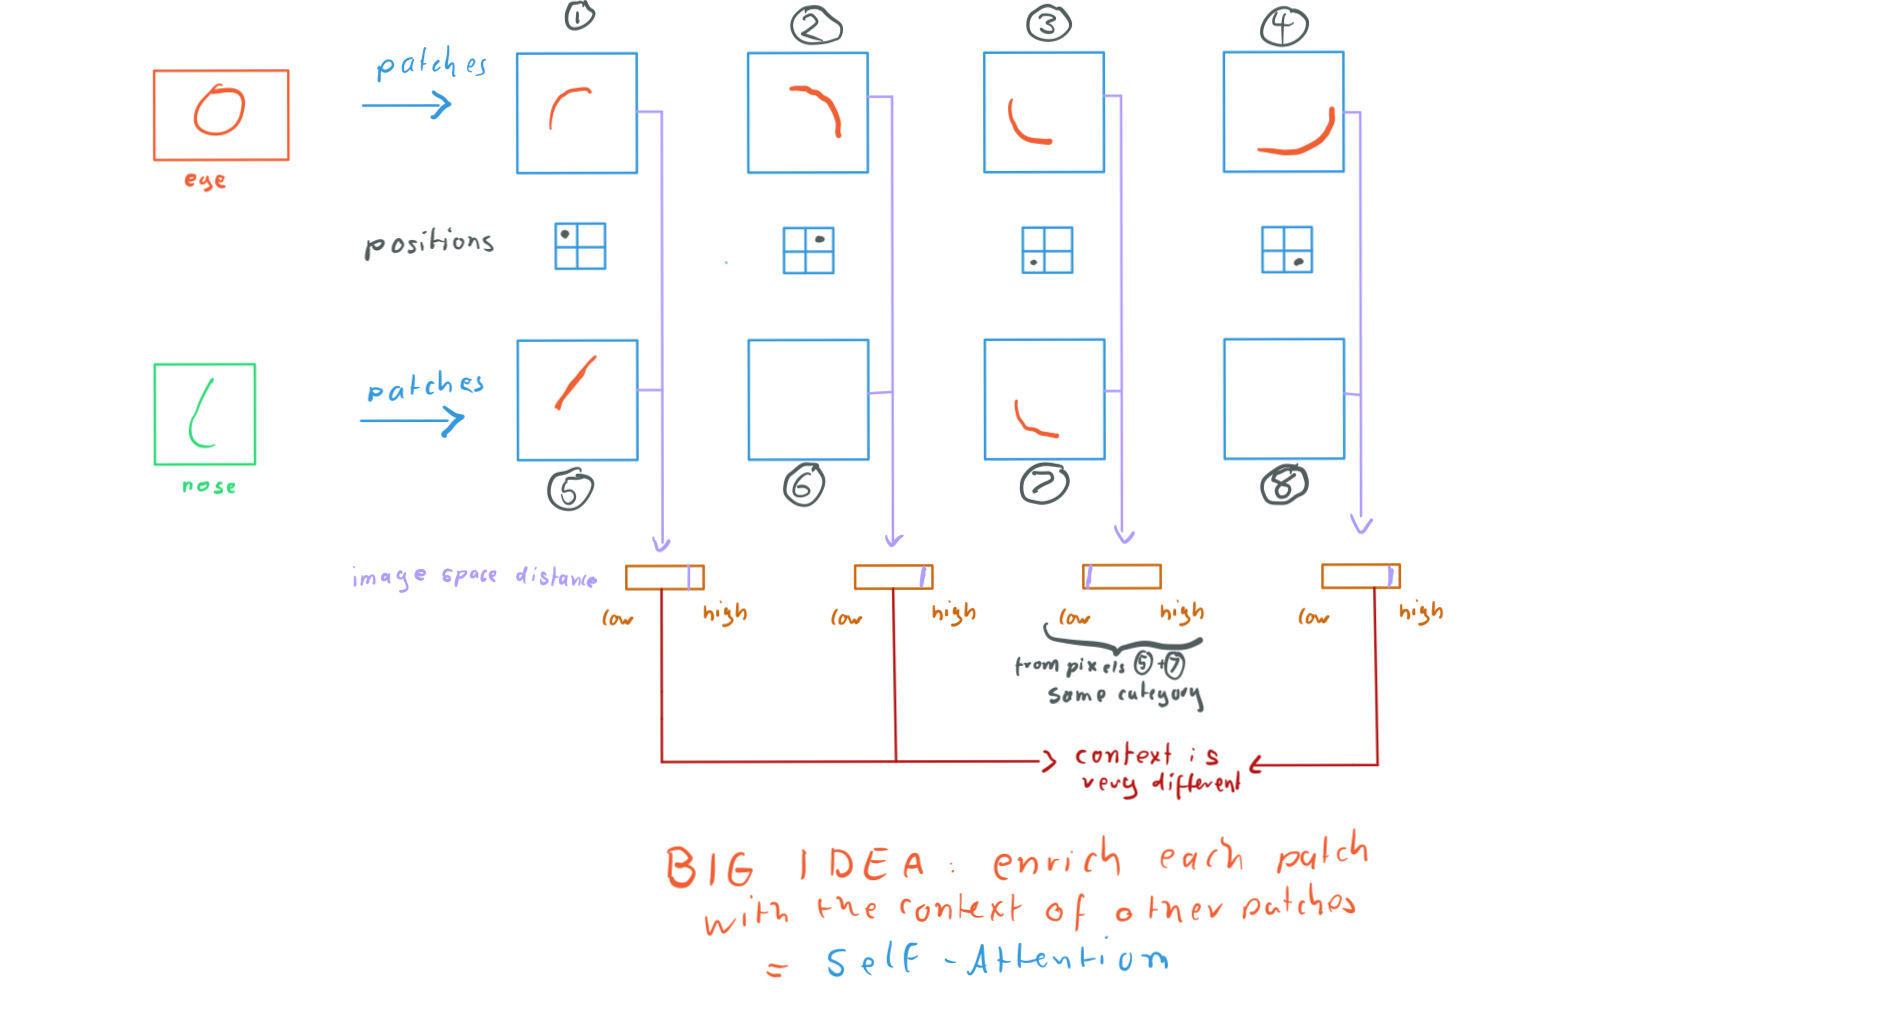

### How does Self-Attention work internally? 

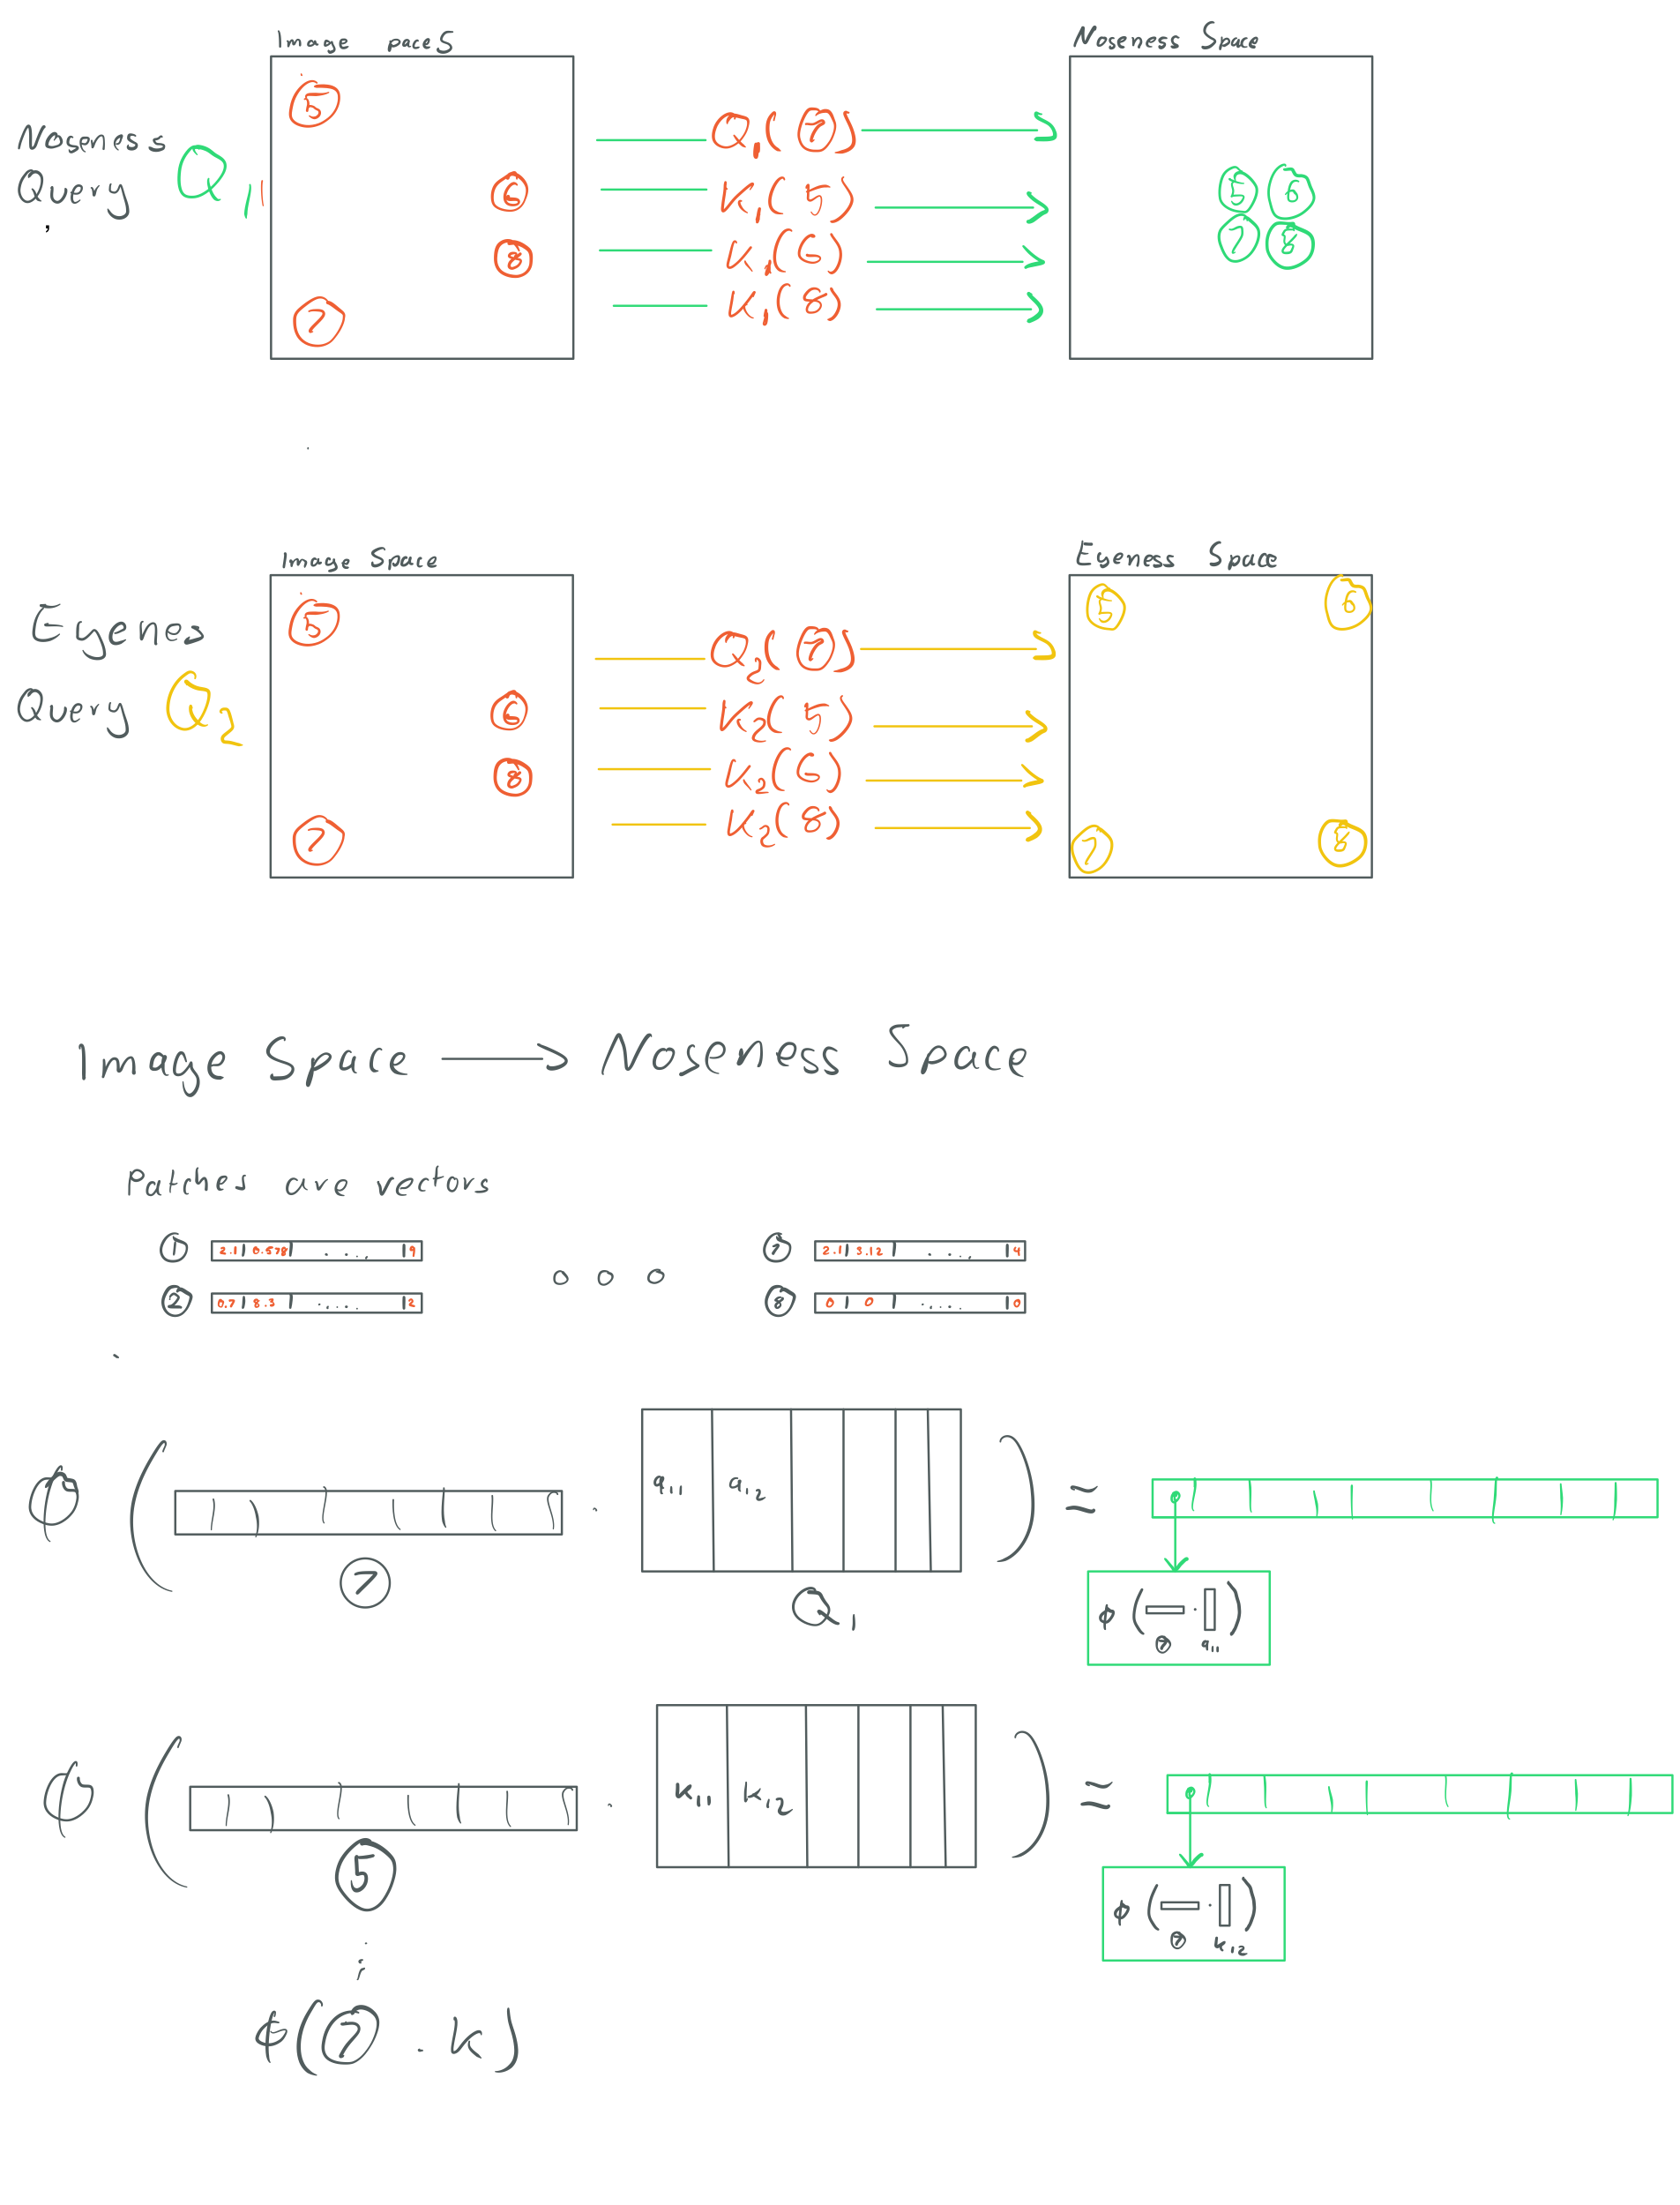

In [ ]:
import torch
from torch import nn


dim = 64 

key = nn.Linear(dim, dim)
query = nn.Linear(dim, dim)
value = nn.Linear(dim, dim)

patches = []
for _ in range(7):
  patch = torch.rand(1, dim)
  patches.append(patch)

query_i = 6
query_patch = patches[query_i]

query_patch.shape, query_patch

(torch.Size([1, 64]),
 tensor([[0.6302, 0.9380, 0.8246, 0.6691, 0.3097, 0.7743, 0.4096, 0.7361, 0.7438,
          0.2335, 0.4108, 0.6983, 0.9590, 0.6379, 0.7890, 0.3451, 0.0551, 0.6102,
          0.6295, 0.5374, 0.5368, 0.6220, 0.4491, 0.2716, 0.0216, 0.5204, 0.9869,
          0.6103, 0.6661, 0.4744, 0.4746, 0.8419, 0.3415, 0.4035, 0.1622, 0.0245,
          0.8345, 0.4528, 0.0482, 0.8602, 0.5152, 0.3955, 0.4113, 0.2363, 0.1378,
          0.5292, 0.4113, 0.8661, 0.2905, 0.3925, 0.4152, 0.2945, 0.7716, 0.1718,
          0.2576, 0.4389, 0.8113, 0.4494, 0.2466, 0.6047, 0.5741, 0.5647, 0.9397,
          0.7182]]))

In [ ]:
query_patch = query(query_patch)
query_patch.shape, query_patch

(torch.Size([1, 64]),
 tensor([[-0.1916,  0.1564, -0.6400, -0.1712, -0.7337, -0.6284,  0.1769,  0.5166,
          -0.2839,  0.4015, -0.1133, -0.4203, -0.0331, -0.4308, -0.2355,  0.2314,
           0.7341, -0.4165, -0.2006,  0.1298,  0.2238, -0.1612,  0.7083, -0.0434,
          -0.4210,  0.0290,  0.0636, -0.4190, -0.4447,  0.1573, -0.3117,  0.5472,
          -0.7037, -0.1462,  0.2753, -0.2483,  0.3195,  0.5168,  0.0145,  0.2996,
          -0.0132, -0.3573, -0.0369, -0.2948,  0.4054, -0.0271,  0.4342, -0.3153,
           0.7034,  0.3419, -0.0849,  0.3793,  0.3593, -0.2889, -0.0315,  0.2980,
          -0.1455,  0.0299,  0.1965,  0.0574,  0.4098, -0.5649, -0.2581,  0.5756]],
        grad_fn=<AddmmBackward>))

In [ ]:
key_patches = [key(patch) for patch in patches]
key_patches[4].shape

torch.Size([1, 64])

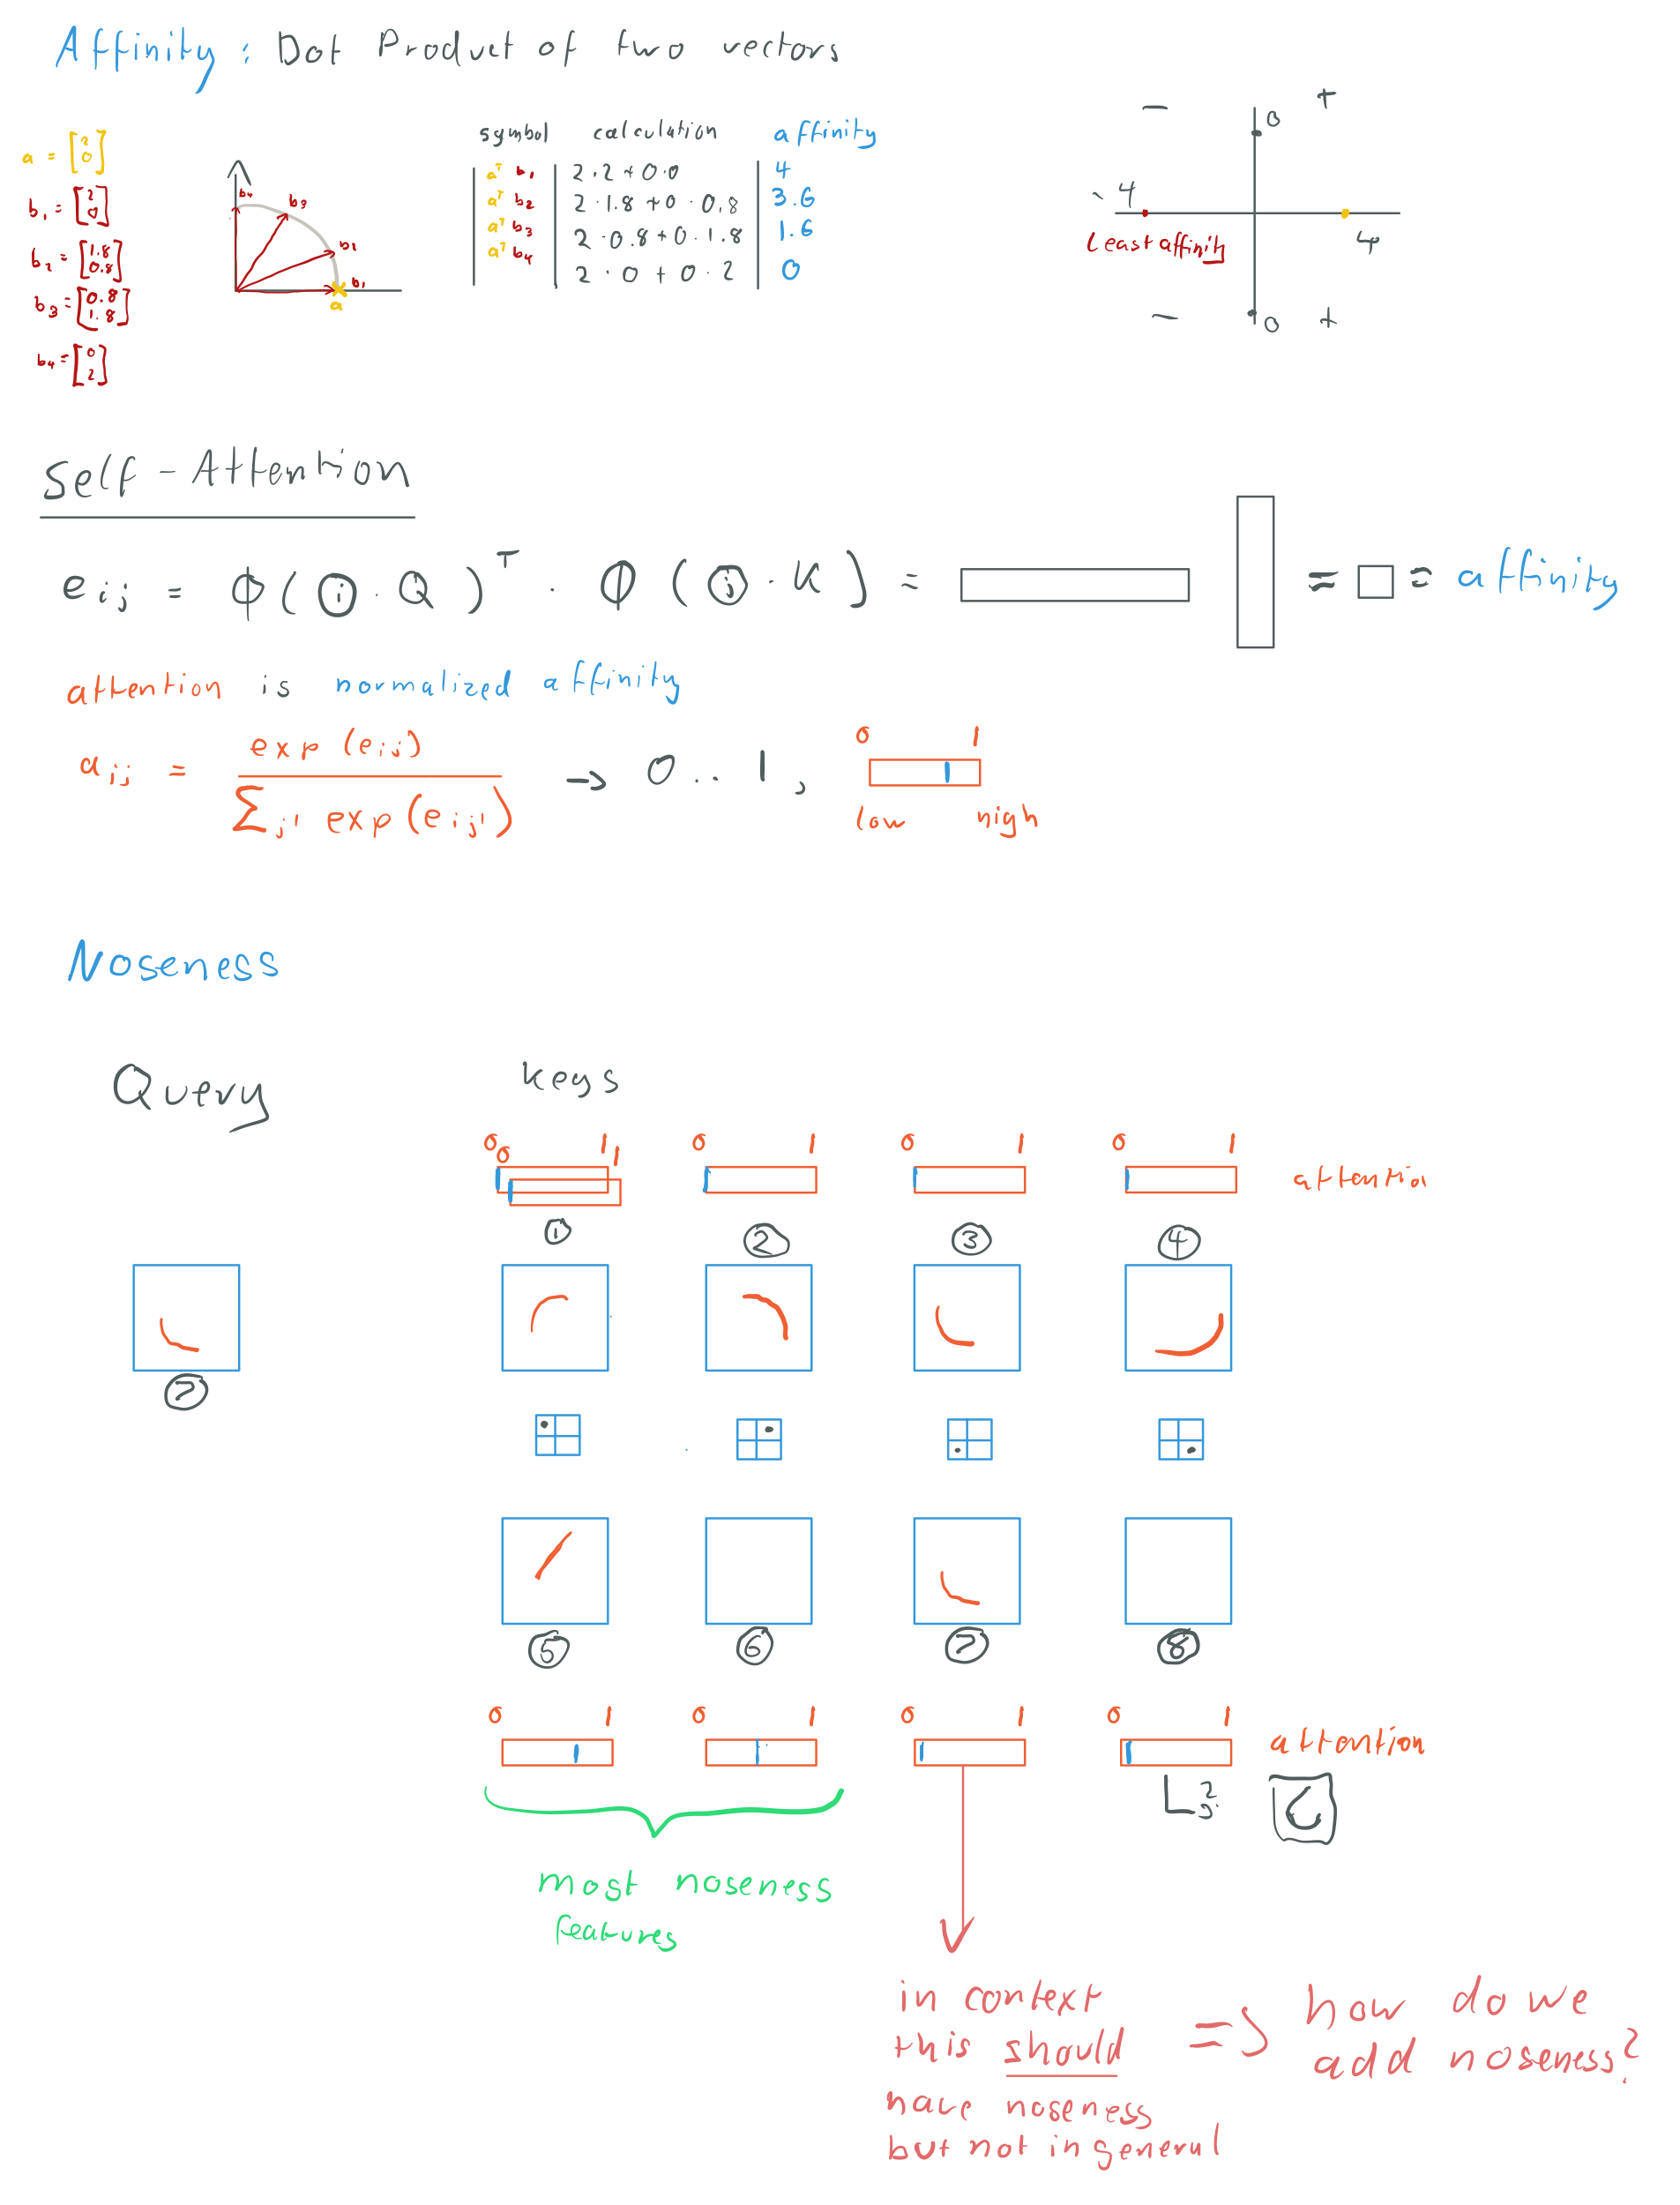

In [ ]:
a = torch.tensor([2., 0.]).reshape(2,1)
a.shape, a

(torch.Size([2, 1]), tensor([[2.],
         [0.]]))

In [ ]:
b1 = torch.tensor([2., 0.]).reshape(2,1)
b2 = torch.tensor([1.8, 0.8]).reshape(2,1)
b3 = torch.tensor([0.8, 1.8]).reshape(2,1)
b4 = torch.tensor([0., 2.]).reshape(2,1)


a1 = a.T @ b1
a2 = a.T @ b2
a3 = a.T @ b3
a4 = a.T @ b4

2*2 + 0*0, a1, a2, a3, a4

(4, tensor([[4.]]), tensor([[3.6000]]), tensor([[1.6000]]), tensor([[0.]]))

In [ ]:
a
b_m = torch.tensor([
                  [2., 0.],
                  [1.8, 0.8],
                  [0.8, 1.8], 
                  [0., 2.]
                  ])

b_m.shape, a.shape

(torch.Size([4, 2]), torch.Size([2, 1]))

In [ ]:
b_m @ a

tensor([[4.0000],
        [3.6000],
        [1.6000],
        [0.0000]])

In [ ]:
nn.functional.softmax(b_m @ a, dim=0)

tensor([[0.5620],
        [0.3767],
        [0.0510],
        [0.0103]])

In [ ]:
s = torch.tensor([0.2, 4, 0.8, 0.2])
nn.functional.softmax(s, dim=0)

tensor([0.0206, 0.9212, 0.0376, 0.0206])

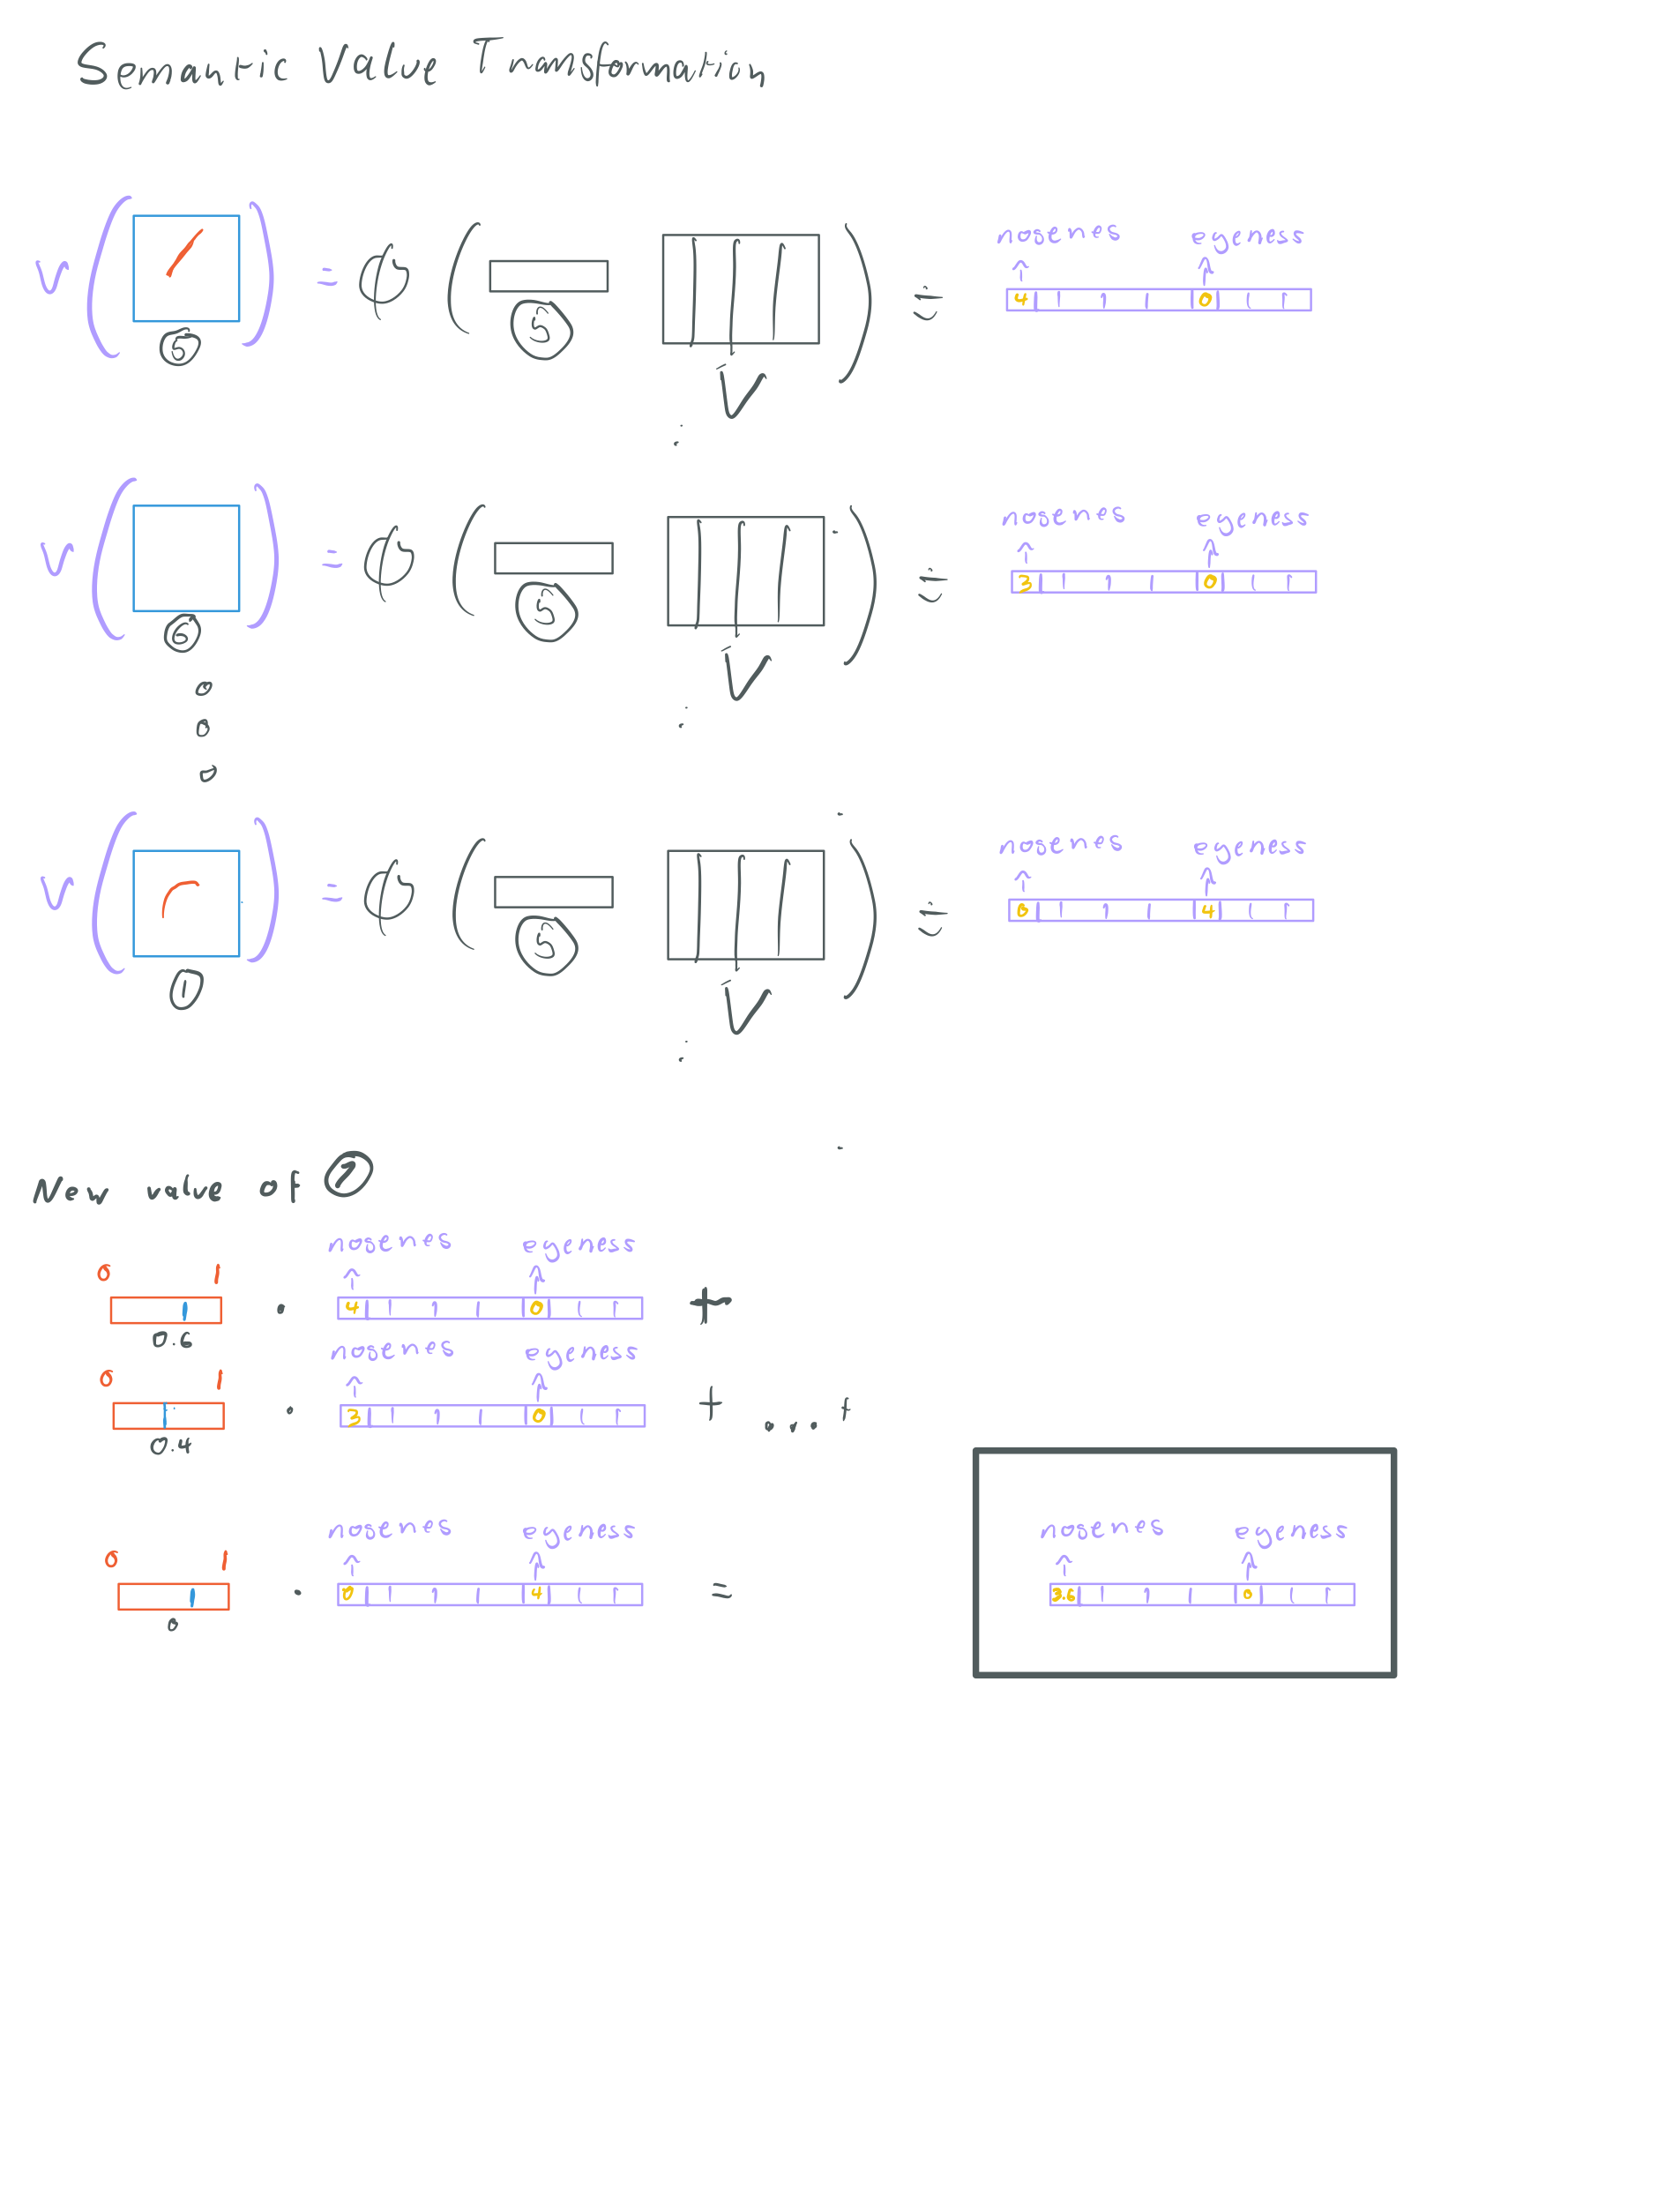

In [ ]:
import torch
from torch import nn
dim = 64 

key = nn.Linear(dim, dim)
query = nn.Linear(dim, dim)
value = nn.Linear(dim, dim)

patches = []
for _ in range(7):
  patch = torch.rand(1, dim)
  patches.append(patch)

query_i = 6
query_patch = patches[query_i]
query_patch = query(query_patch)

key_patches = [key(patch) for patch in patches]

key_patches = torch.cat(key_patches)
key_patches.shape

torch.Size([7, 64])

In [ ]:
attention = key_patches @ query_patch.T
attention.shape, attention

(torch.Size([7, 1]), tensor([[-2.9435],
         [-3.1563],
         [-2.6490],
         [-2.3581],
         [-2.2065],
         [-1.3725],
         [-1.9882]], grad_fn=<MmBackward>))

In [ ]:
normalized = nn.functional.softmax(attention, dim=0)
normalized

tensor([[0.0692],
        [0.0559],
        [0.0929],
        [0.1243],
        [0.1446],
        [0.3330],
        [0.1799]], grad_fn=<SoftmaxBackward>)

In [ ]:
value_patches = [value(patch) for patch in patches]
value_patches = torch.cat(value_patches)
normalized.shape, value_patches.shape

(torch.Size([7, 1]), torch.Size([7, 64]))

In [ ]:
new_vector = normalized.T @ value_patches
new_vector.shape, new_vector

(torch.Size([1, 64]),
 tensor([[ 0.8750, -0.5067, -0.1029,  0.1323,  0.0197,  0.3704,  0.4193, -0.1173,
          -0.0584,  0.1305,  0.2033,  0.2488, -0.0087, -0.4977,  0.2067,  0.4365,
          -0.1661, -0.2425, -0.4783,  0.3493,  0.0991, -0.4026,  0.1191,  0.0443,
           0.1645,  0.1420, -0.1734, -0.1156, -0.6161, -0.1910,  0.6968,  0.0587,
           0.5025,  0.0034, -0.0460,  0.2989,  0.5689,  0.0670,  0.1532,  0.0983,
           0.1373, -0.1225,  0.0833, -0.3670,  0.5948,  0.1606, -0.4203, -0.7407,
          -0.2312, -0.3519, -0.1525,  0.0386,  0.1804,  0.2080,  0.4070,  0.1399,
          -0.0935, -0.1435,  0.3406, -0.4037, -0.1417,  0.0435, -0.3603,  0.3993]],
        grad_fn=<MmBackward>))

In [ ]:
patches = torch.rand(8, 64)
q = query(patches)
k = key(patches)
v = value(patches)

q.shape, k.shape, v.shape

(torch.Size([8, 64]), torch.Size([8, 64]), torch.Size([8, 64]))

In [ ]:
attention = q @ k.T 
attention.shape

torch.Size([8, 8])

In [ ]:
normalized = nn.functional.softmax(attention, dim=0)
normalized.shape, normalized, torch.sum(attention, dim=0), torch.sum(normalized, dim=0)

(torch.Size([8, 8]),
 tensor([[0.0922, 0.1030, 0.1214, 0.0850, 0.0838, 0.1045, 0.0771, 0.1379],
         [0.1017, 0.1288, 0.1001, 0.1154, 0.1339, 0.1019, 0.2079, 0.1515],
         [0.1622, 0.1778, 0.1796, 0.1847, 0.1409, 0.1243, 0.0908, 0.1493],
         [0.1172, 0.1478, 0.1063, 0.1314, 0.1431, 0.1125, 0.1221, 0.1252],
         [0.1243, 0.1208, 0.1133, 0.1113, 0.1375, 0.0914, 0.1097, 0.0963],
         [0.1800, 0.1330, 0.1562, 0.1743, 0.1070, 0.1479, 0.1256, 0.1347],
         [0.0564, 0.0433, 0.0758, 0.0560, 0.1186, 0.1911, 0.1401, 0.0660],
         [0.1660, 0.1454, 0.1474, 0.1418, 0.1351, 0.1265, 0.1267, 0.1392]],
        grad_fn=<SoftmaxBackward>),
 tensor([-10.8533,  -4.0519,  -5.8866, -13.2869, -15.5431,  -7.5840, -12.3224,
          -0.1232], grad_fn=<SumBackward1>),
 tensor([1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SumBackward1>))

In [ ]:
normalized.shape, v.shape

(torch.Size([8, 8]), torch.Size([8, 64]))

In [ ]:
output = normalized @ v
output.shape

torch.Size([8, 64])

## Foundational Concept: Deep Learning

### Projection into latent Space

### Similiarity of Vectors

## Building Block: Multiheaded Attention

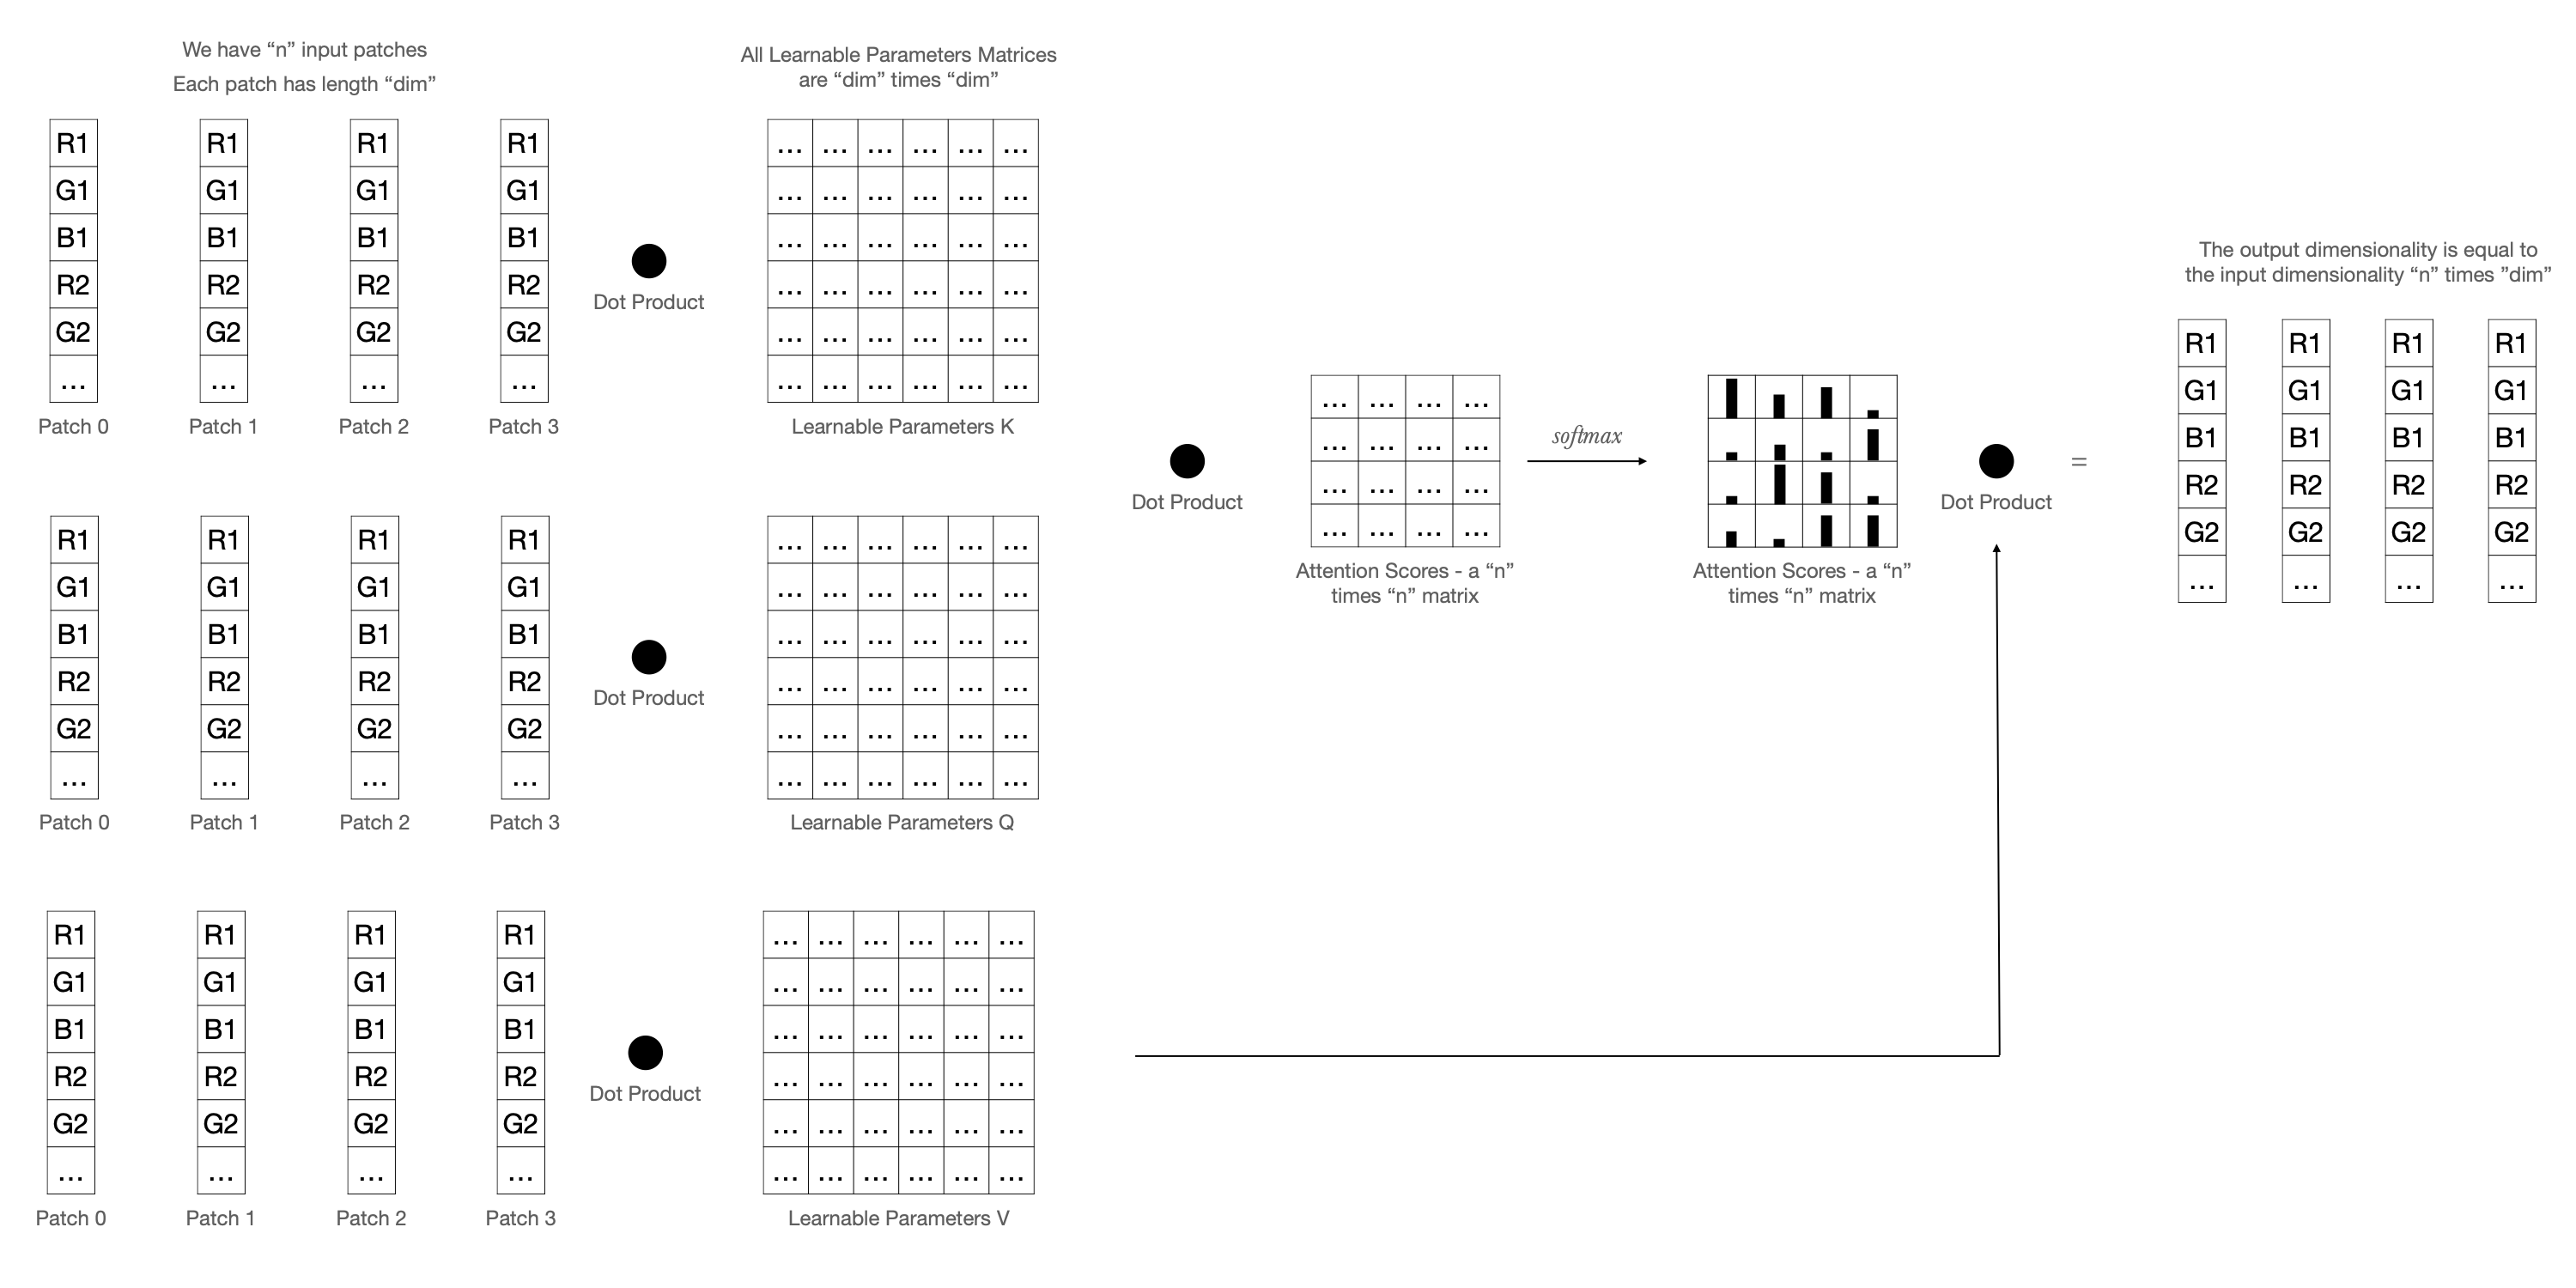

https://www.tensorflow.org/guide/tensor

In [ ]:
key = nn.Linear(dim, dim)
query = nn.Linear(dim, dim)
value = nn.Linear(dim, dim)

# regularization
resid_drop = nn.Dropout(0.2)

# output projection
proj = nn.Linear(dim, dim)

n_head = 2

In [ ]:
import math
from torch.nn import functional as F

b, n, _ = x.size()
b, n

(100, 5)

In [ ]:
# calculate query, key, values for all heads in batch and move head forward to be the batch dim
k = key(x).view(b, n, n_head, dim // n_head).transpose(1, 2) # (b, nh, n, hs)
q = query(x).view(b, n, n_head, dim // n_head).transpose(1, 2) # (b, nh, n, hs)
v = value(x).view(b, n, n_head, dim // n_head).transpose(1, 2) # (b, nh, n, hs)
k.shape, q.shape, v.shape

(torch.Size([100, 2, 5, 32]),
 torch.Size([100, 2, 5, 32]),
 torch.Size([100, 2, 5, 32]))

In [ ]:
# self-attention; Self-attend: (b, nh, n, hs) x (b, nh, hs, n) -> (b, nh, n, n)
att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
att.shape

torch.Size([100, 2, 5, 5])

In [ ]:
att = F.softmax(att, dim=-1)
att.shape

torch.Size([100, 2, 5, 5])

In [ ]:
y = att @ v # (b, nh, n, n) x (b, nh, n, hs) -> (b, nh, n, hs)
y.shape

torch.Size([100, 2, 5, 32])

In [ ]:
y = y.transpose(1, 2).contiguous().view(b, n, dim) # re-assemble all head outputs side by side
y.shape

torch.Size([100, 5, 64])

In [ ]:
y = resid_drop(proj(y))
y.shape

torch.Size([100, 5, 64])

In [ ]:
class MultiheadAttention(nn.Module):
    """
    A vanilla multi-head masked self-attention layer with a projection at the end.
    It is possible to use torch.nn.MultiheadAttention here but I am including an
    explicit implementation here to show that there is nothing too scary here.
    """

    def __init__(self, dim, resid_pdrop, n_head):
        super().__init__()
        # key, query, value projections for all heads
        self.key = nn.Linear(dim, dim)
        self.query = nn.Linear(dim, dim)
        self.value = nn.Linear(dim, dim)

        # regularization
        self.resid_drop = nn.Dropout(resid_pdrop)

        # output projection
        self.proj = nn.Linear(dim, dim)

        # causal mask to ensure that attention is only applied to the left in the input sequence
        self.n_head = n_head

    def forward(self, x, layer_past=None):
        b, n, dim = x.size()

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        k = self.key(x).view(b, n, self.n_head, dim // self.n_head).transpose(1, 2) # (b, nh, n, hs)
        q = self.query(x).view(b, n, self.n_head, dim // self.n_head).transpose(1, 2) # (b, nh, n, hs)
        v = self.value(x).view(b, n, self.n_head, dim // self.n_head).transpose(1, 2) # (b, nh, n, hs)

        # causal self-attention; Self-attend: (b, nh, n, hs) x (b, nh, hs, n) -> (b, nh, n, n)
        att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        att = F.softmax(att, dim=-1)
        y = att @ v # (b, nh, T, T) x (b, nh, T, hs) -> (b, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(b, n, dim) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_drop(self.proj(y))
        return y

In [ ]:
ma = MultiheadAttention(dim, 0.3, 2)
ma(x).shape

torch.Size([100, 5, 64])

## Building Block: Encoder


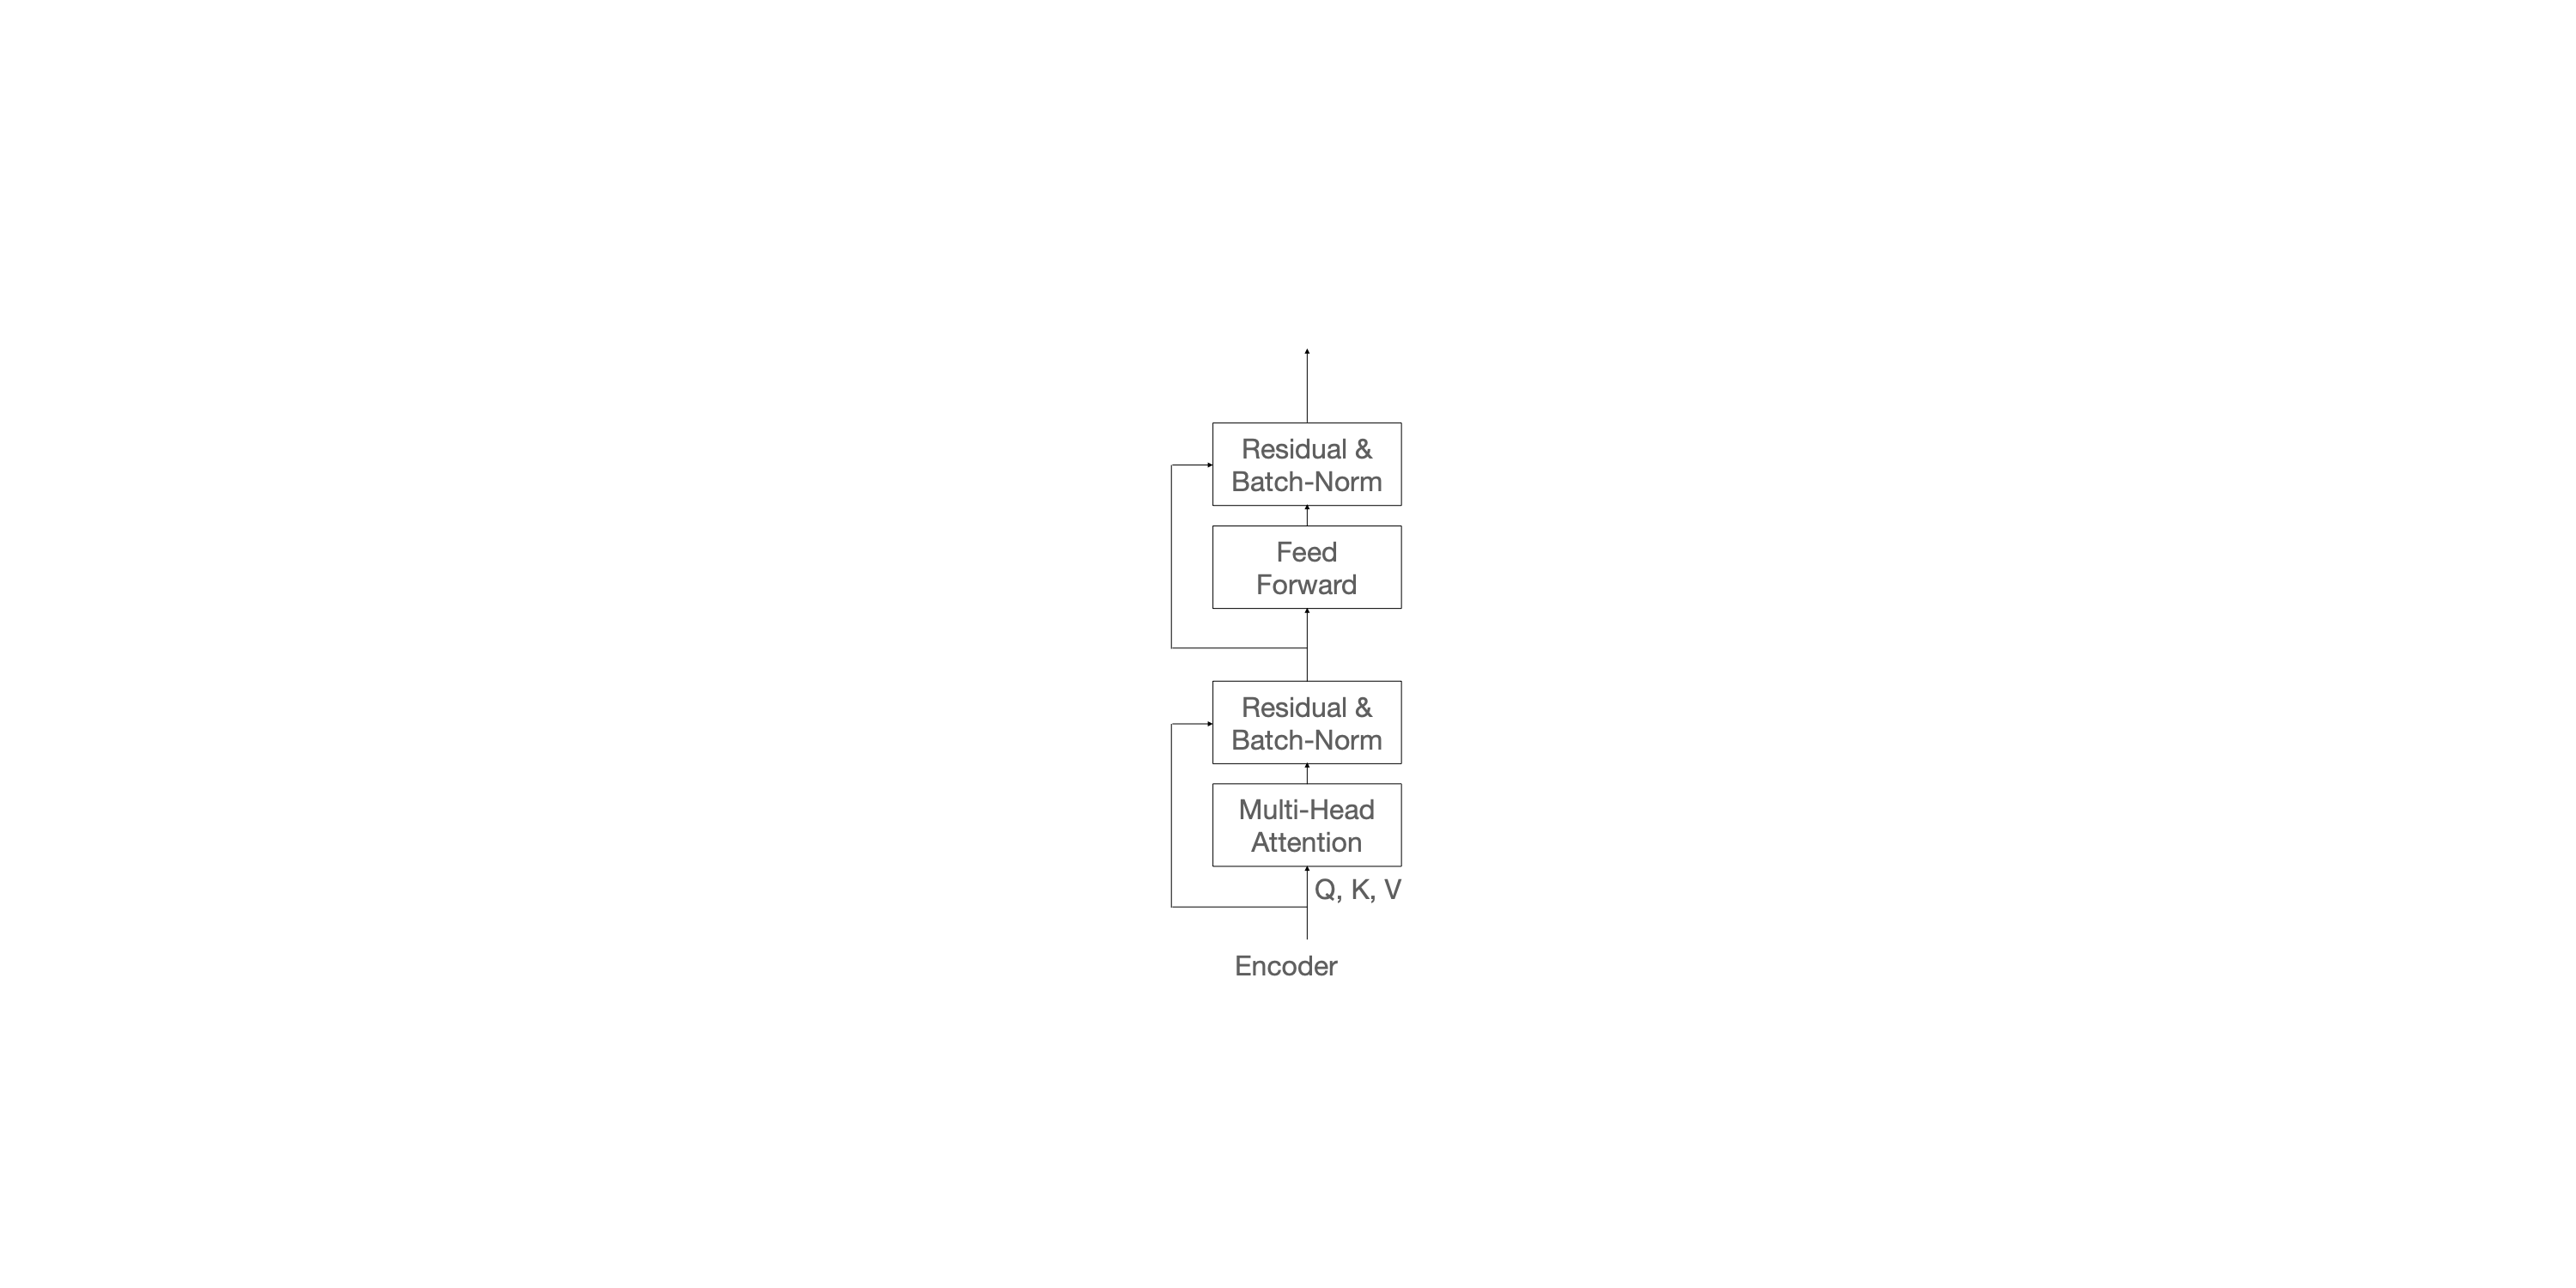

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)


class Encoder(nn.Module):
    def __init__(self, dim, n_head, ff_hidden_dim, dropout = 0.):
        super().__init__()

        self.norm_attention = nn.LayerNorm(dim)
        self.attention = MultiheadAttention(dim, dropout, n_head)
        self.norm_ff = nn.LayerNorm(dim)
        self.ff = FeedForward(dim, ff_hidden_dim, dropout)

    def forward(self, x):
        x = self.norm_attention(x)
        x = self.attention(x) + x # Residual!
        x = self.norm_ff(x)
        x = self.ff(x) + x # Residual!

        return x


class Transformer(nn.Module):
    def __init__(self, dim, depth, n_head, ff_hidden_dim, dropout = 0.):
        super().__init__()
        self.encoders = nn.ModuleList([])

        for _ in range(depth):
            self.encoders.append(Encoder(dim, n_head, ff_hidden_dim, dropout))

    def forward(self, x):
        for encoder in self.encoders:
            x = encoder(x)
        return x

In [ ]:
t = Transformer(dim, 2, 2, 32)
t(x).shape

torch.Size([100, 5, 64])

## Building Block: Decoder

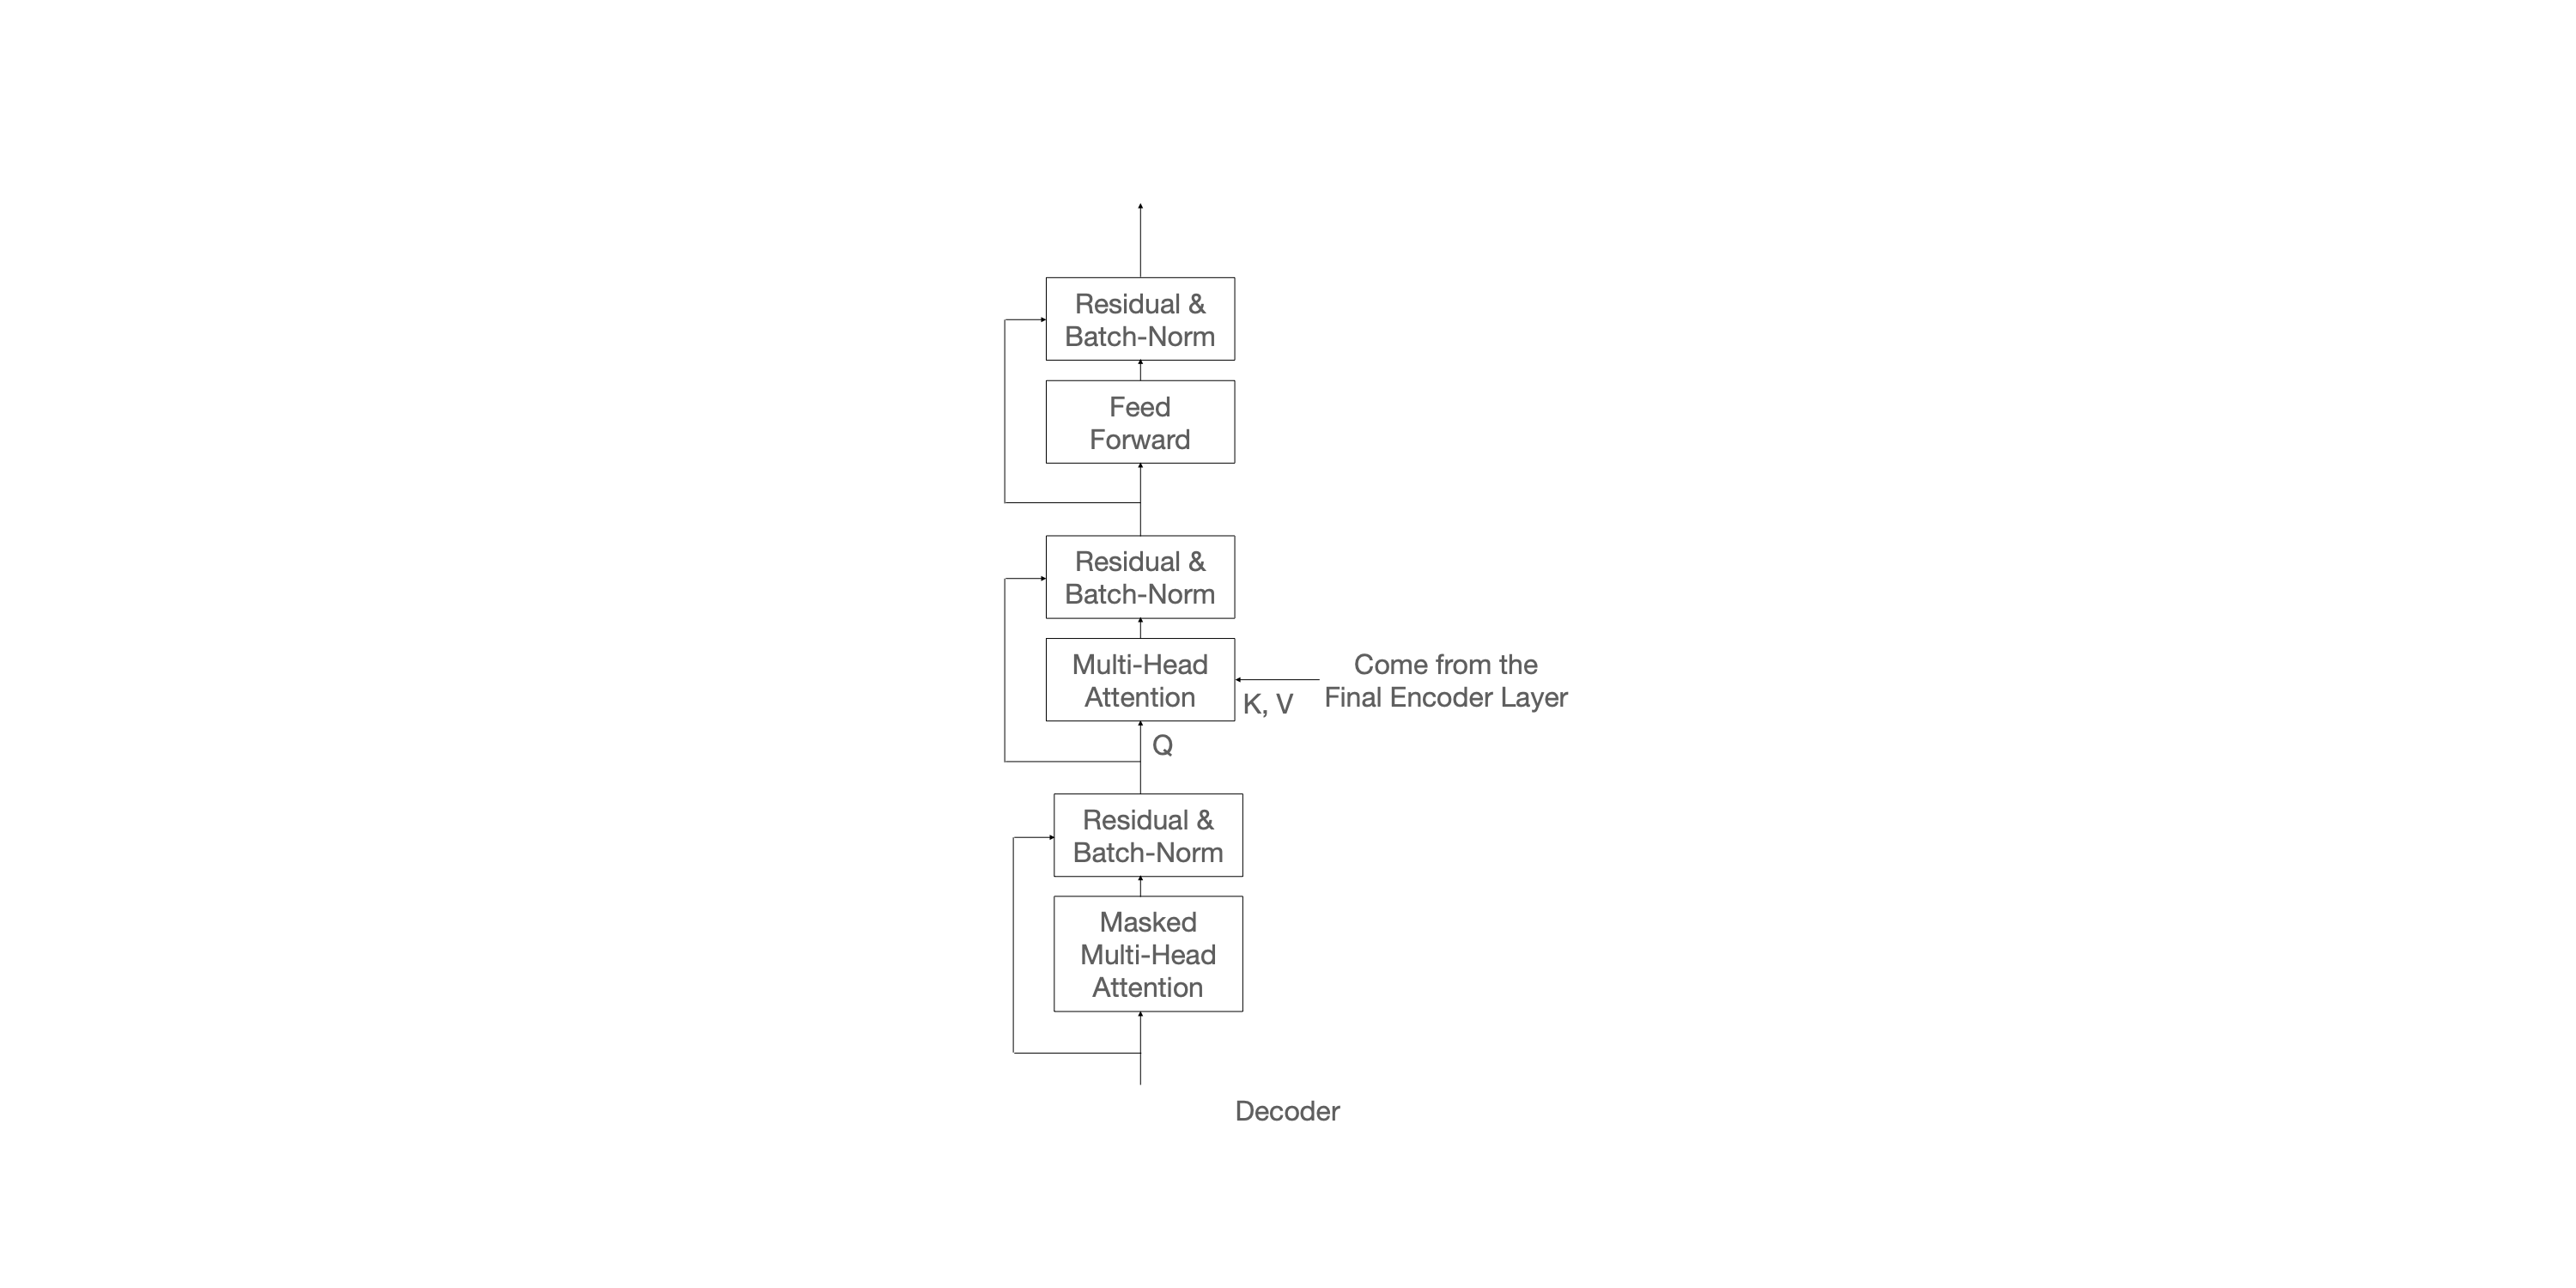

## Building Block: Classifier

In [ ]:
class ViT(nn.Module):
    def __init__(self, image_size, patch_size, num_classes, dim, depth, n_head, ff_hidden_dim, channels = 3, dropout = 0., emb_dropout = 0.):
        super().__init__()
        image_height, image_width = image_size, image_size
        patch_height, patch_width = patch_size, patch_size

        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width

        self.to_patch_embedding = nn.Sequential(
            Rearrange('b (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width),
            nn.Linear(patch_dim, dim),
        )

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.dropout = nn.Dropout(emb_dropout)

        self.transformer = Transformer(dim, depth, n_head, ff_hidden_dim, dropout)


        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, img):
        x = self.to_patch_embedding(img)
        b, n, _ = x.shape

        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b = b)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding[:, :(n + 1)]
        x = self.dropout(x)

        x = self.transformer(x)

        x = x[:, 0]

        return self.mlp_head(x)

In [ ]:
ViT(24, 12, 42, 64, 3, 2, 32)(Tensor(images)).shape

torch.Size([100, 42])

In [ ]:
import copy

In [ ]:
import torch.optim as optim

epochs = 100
net = ViT(24, 12, 43, 64, 3, 2, 32).cuda()
best = copy.deepcopy(net)

best_loss = 40 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
i = 0

running_loss = 0. 
for epoch in range(epochs): 
  running_loss = 0. 
  for batch_ndx, (images, labels) in enumerate(loader):
      images = images.cuda()
      labels = labels.cuda()
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()

  print('[%d] loss: %.3f' %
        (epoch + 1, running_loss))
  if running_loss < best_loss: 
    best = copy.deepcopy(net)
    best_loss = running_loss
  running_loss = 0.0
  


[1] loss: 1280.303
[2] loss: 432.890
[3] loss: 270.081
[4] loss: 206.014
[5] loss: 167.923
[6] loss: 138.664
[7] loss: 127.218
[8] loss: 109.913
[9] loss: 93.880
[10] loss: 83.389
[11] loss: 82.855
[12] loss: 71.739
[13] loss: 68.211
[14] loss: 69.346
[15] loss: 58.356
[16] loss: 62.590
[17] loss: 54.909
[18] loss: 55.751
[19] loss: 49.894
[20] loss: 57.954
[21] loss: 43.142
[22] loss: 44.201
[23] loss: 42.721
[24] loss: 44.299
[25] loss: 40.466
[26] loss: 41.042
[27] loss: 40.392
[28] loss: 28.517
[29] loss: 42.672
[30] loss: 36.846
[31] loss: 42.380
[32] loss: 24.937
[33] loss: 27.710
[34] loss: 39.406
[35] loss: 29.818
[36] loss: 33.535
[37] loss: 31.064
[38] loss: 25.459
[39] loss: 35.621
[40] loss: 24.634
[41] loss: 26.754
[42] loss: 39.893
[43] loss: 19.820
[44] loss: 19.001
[45] loss: 28.496
[46] loss: 29.016
[47] loss: 27.906
[48] loss: 25.977
[49] loss: 17.022
[50] loss: 34.182
[51] loss: 28.840
[52] loss: 18.337
[53] loss: 18.848
[54] loss: 25.722
[55] loss: 17.669
[56] loss:

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in loader_test:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        # calculate outputs by running images through the network
        outputs = best(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the {total} test images: {100 * correct / total}")

Accuracy of the network on the 39209 test images: 99.12520084674436


In [ ]:
correct /  total

0.9912520084674437

In [ ]:
3import os

model_dir = "/content/drive/MyDrive/oreilly/"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

save_path = os.path.join(model_dir, "model.pth")
torch.save(best.state_dict(), save_path)

With about 300 epochs and meta params of: 
ViT(24, 12, 43, 64, 6, 2, 32)

You can get: 

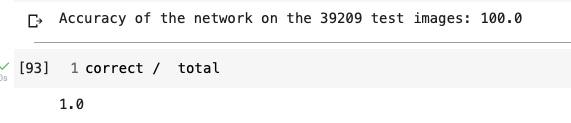

## Current Applications and Next Steps
